In [29]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Do not forget so space out the requests
spotify = spotipy.Spotify(
    client_credentials_manager=SpotifyClientCredentials())

# 1 - Build a population of artists

artist_map = {
    "11E9GHIAzJRKuECEUSEuqh": "Cheb Bello",  
    "3e3cKwH1kUr02bvIm7VaIe": "Kader Japonais",
    "5CZ5sGdn0X47HhndSYKqdz": "Cheba Dalila",
    "0c3dDCJfxcT4lYNugbKvJt": "Warda",
    "4iCrZzxACYPYcoS71DgjWW": "Bilal Sghir",
    "59N7N5tX53jyPhAmsRi4or": "Cheb Bilal",
    "4ZzMtjQsjtaAOm3GPqmjeQ" : "Cheb Djalil",
    "4l3uOQQa1NaZz7OVNAjbC2": "Cheb Houssem",
    "2zjXHi6RZyaS2t0P1BrxBs": "Cheb Mourad"
}

# 1.5 - Get basic artist info (Monthly listeners for instance)
selected_artists = spotify.artists(artist_map.keys()).get("artists")

# 2 - Get their top tracks
top_tracks = list()
for artist_id in artist_map.keys():
    artist_top_tracks = spotify.artist_top_tracks(artist_id).get("tracks")
    for artist_top_track in artist_top_tracks: 
        artist_top_track["main_artist"] = artist_map.get(artist_id)

    top_tracks.extend(artist_top_tracks)

# 3 - Get maximum track features
def get_track_id(track):
    return track.get("id")

tracks_ids = list(map(get_track_id, top_tracks))
audio_features = spotify.audio_features(tracks=tracks_ids)

# 4 - Store the data in a CSV file
# 5 - Create a notebook and explore the data

In [30]:
import pandas as pd 
import numpy as np

af = pd.DataFrame(audio_features)
tt = pd.DataFrame(top_tracks)

df = pd.merge(tt, af, how="left", on="id")
df = df[['id', 'name', 'main_artist', 'duration_ms_x', 'danceability', 'loudness', 'energy', 'instrumentalness', 'liveness', 'valence', 'speechiness', 'tempo', 'popularity']]
df = df.sort_values(by=['popularity'], ascending=False)

df.head()

,id,name,main_artist,duration_ms_x,danceability,loudness,energy,instrumentalness,liveness,valence,speechiness,tempo,popularity
10,1Ld7ou1JXz77rg70AG7usC,El Walida,Kader Japonais,252000,0.611,-8.611,0.743,0.000000,0.1110,0.541,0.0833,79.996,56
1,1Z3UznHCGkclMLMOBRxeHN,3adyani Bel Gros - Remix Master T,Cheb Bello,226811,0.672,-6.673,0.787,0.543000,0.2060,0.594,0.0452,91.992,47
0,1mhKtcpIVEwvE7qs32HcwI,Manich Kima Bakri,Cheb Bello,345652,0.705,-4.308,0.894,0.000005,0.0725,0.890,0.0950,96.066,47
11,25MuzemzYte78t3ZIzM2jk,Malou Malou,Kader Japonais,164192,0.655,-6.014,0.727,0.000021,0.1370,0.372,0.0666,100.210,45
70,4hQgTdJF1Z1PdDrhjYBiUC,Choufi Bentek Ma Daret Fiya,Cheb Houssem,325896,0.638,-6.552,0.856,0.000000,0.2670,0.757,0.2110,141.880,45


In [31]:
df.to_csv("out.csv", index=False)

## Correlations

Text(0.5, 1.0, 'Rai songs - Audio features and popularity - Correlation matrix')

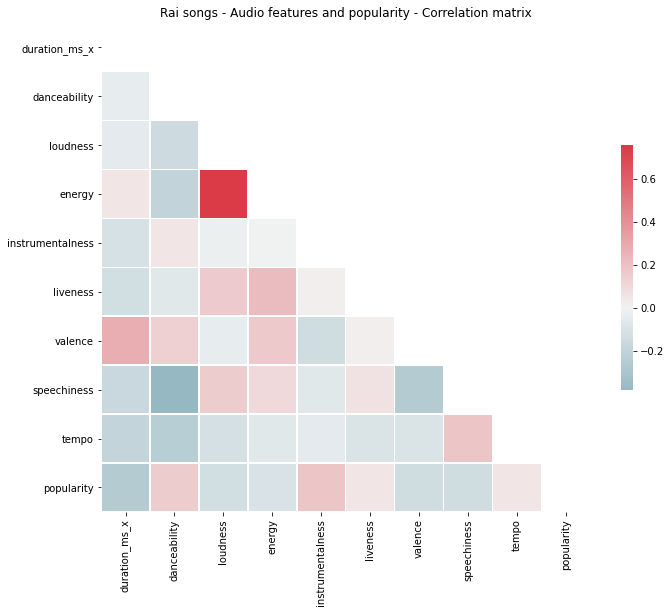

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df.loc[:, 'duration_ms_x':'popularity']
df = df.infer_objects()
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Rai songs - Audio features and popularity - Correlation matrix")